В проектной работе хотела бы сделать анализ по пассажирскому трафику в Российских аэропортах.
данные возьму отсюда 
https://www.kaggle.com/vitaliymalcev/russian-passenger-air-service-20072020
По годам/месяцам рассчитать основные статистические показатели: Мода, медиана, квартили, дисперсию.
ПОсмотреть как пассажирский поток меняется по времени
Проверить, есть ли какие - либо зависимости

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
df = pd.read_csv("/russian_passenger_air_service_2.csv")

In [4]:
df

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Airport coordinates
0,Abakan,2020,13495.0,14940.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('91.399735'), Decimal('53.751351'))"
1,Aikhal,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('111.543324'), Decimal('65.957161'))"
2,Loss,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('125.398355'), Decimal('58.602489'))"
3,Amderma,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('61.577429'), Decimal('69.759076'))"
4,Anadyr (Carbon),2020,4255.0,4565.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('177.738273'), Decimal('64.713433'))"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,Yakutsk,2007,27636.0,25976.0,34291.0,38803.0,38478.0,59142.0,67295.0,75257.0,52681.0,44505.0,40439.0,1916.60,545577.0,"(Decimal('129.750225'), Decimal('62.086594'))"
3957,Yakutsk (Magan),2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('-6.226888'), Decimal('8.607871'))"
3958,Yamburg,2007,6239.0,3195.0,6648.0,6268.0,6088.0,6028.0,5975.0,6024.0,6262.0,6451.0,6968.0,8.87,72626.0,"(Decimal('75.097783'), Decimal('67.980026'))"
3959,Yaroslavl (Tunoshna),2007,557.0,720.0,650.0,411.0,328.0,864.0,688.0,965.0,883.0,505.0,640.0,2055.60,8277.0,"(Decimal('40.170054'), Decimal('57.56231'))"


In [5]:
df_years=df.drop('Airport coordinates', axis=1)
df_years=df_years.rename(columns={'Airport name':'Airport_name'})
df_years=df_years.rename(columns={'Whole year':'Whole_year'})
df_years=df_years[df_years.Whole_year>0]

In [6]:
df_years

,Airport_name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole_year
250,Abakan,2019,12571.0,11563.0,12427.0,13023.0,16641.0,22758.0,27883.0,27391.0,19478.0,16155.0,14745.0,89.80,209772.0
254,Anadyr (Carbon),2019,3785.0,3916.0,5061.0,7169.0,8601.0,10464.0,13569.0,13429.0,11190.0,8370.0,7144.0,199.00,102129.0
255,Anapa (Vitjazevo),2019,52526.0,42294.0,55115.0,59989.0,93349.0,259787.0,328287.0,345629.0,226477.0,73539.0,51820.0,82.10,1641376.0
258,Arkhangelsk (Talagy),2019,60528.0,53932.0,64110.0,70235.0,80177.0,91882.0,100833.0,102409.0,84441.0,71691.0,74218.0,307.10,922539.0
259,Astrakhan (Narimanovo),2019,41114.0,39174.0,45243.0,53806.0,61787.0,57785.0,64972.0,67742.0,72390.0,67318.0,51527.0,99.16,672456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3943,Reads (tub),2007,7505.0,8233.0,9352.0,9388.0,9617.0,13377.0,16946.0,19003.0,14478.0,12154.0,11054.0,184.00,143337.0
3955,Yuzhno-(Khomutovo),2007,42441.0,35639.0,38866.0,42524.0,45660.0,57415.0,71830.0,74751.0,63180.0,56061.0,47176.0,1632.10,625294.0
3956,Yakutsk,2007,27636.0,25976.0,34291.0,38803.0,38478.0,59142.0,67295.0,75257.0,52681.0,44505.0,40439.0,1916.60,545577.0
3958,Yamburg,2007,6239.0,3195.0,6648.0,6268.0,6088.0,6028.0,5975.0,6024.0,6262.0,6451.0,6968.0,8.87,72626.0


In [7]:
# рассмотрим данные по одному из аэропортов - пассажиропоток на год и расчитаем среднее значение, 
# ср квадратичное отклонение , дисперсию, корреляци, ковариацию
selection = df_years.Airport_name!='Abakan'

In [8]:
df_Abakan_years= df_years[~selection]

In [9]:
df_Abakan_years

,Airport_name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole_year
250,Abakan,2019,12571.0,11563.0,12427.0,13023.0,16641.0,22758.0,27883.0,27391.0,19478.0,16155.0,14745.0,89.80,209772.0
501,Abakan,2018,11851.0,10504.0,11591.0,12323.0,14314.0,19935.0,25213.0,25507.0,19295.0,15815.0,15645.0,98.93,197222.0
749,Abakan,2017,11004.0,9761.0,10530.0,11466.0,14786.0,17209.0,23901.0,23688.0,18991.0,15891.0,13588.0,88.84,185185.0
1041,Abakan,2016,10773.0,9328.0,10665.0,12014.0,14035.0,19881.0,22877.0,24326.0,17307.0,13986.0,12677.0,94.01,181196.0
1333,Abakan,2015,12008.0,10324.0,11273.0,12265.0,15559.0,20670.0,24157.0,24219.0,19813.0,16601.0,12528.0,78.30,192155.0
1625,Abakan,2014,12596.0,12149.0,13969.0,13415.0,14694.0,20706.0,23056.0,24461.0,18644.0,15667.0,14907.0,83.38,197992.0
1917,Abakan,2013,9179.0,8747.0,9488.0,9783.0,9977.0,15524.0,16938.0,18095.0,15277.0,12397.0,13977.0,83.34,153986.0
2209,Abakan,2012,6141.0,6790.0,7258.0,9291.0,10554.0,13048.0,13398.0,14015.0,10729.0,8707.0,9585.0,81.25,120531.0
2501,Abakan,2011,5030.0,4357.0,5839.0,5751.0,7112.0,10568.0,11913.0,12376.0,9357.0,7060.0,6459.0,124.56,93425.0
2793,Abakan,2010,3779.0,4645.0,5328.0,5000.0,6521.0,10541.0,11274.0,12622.0,9298.0,7988.0,6314.0,110.60,89431.0


<function matplotlib.pyplot.show>

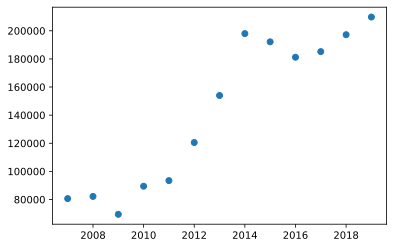

In [10]:
plt.scatter(df_Abakan_years['Year'], df_Abakan_years['Whole_year'])
plt.show

In [11]:
#среднее значение пассажиров за год
mean_count = df_Abakan_years['Whole_year'].sum() / df_Abakan_years['Whole_year'].count()
mean_count

142550.15384615384

In [12]:
df_Abakan_years['Whole_year'].mean()

142550.15384615384

In [13]:
#Среднее квадратичное отклонение
df_Abakan_years['Whole_year'].std(ddof=0)

51907.13282961905

In [14]:
#Рассчитаем несмещенную дисперсию количества пассажиров
df_Abakan_years['Whole_year'].var(ddof=1)

2918879641.807692

In [15]:
#Рассчитаем смещенную дисперсию количества пассажиров
df_Abakan_years['Whole_year'].var(ddof=0)

2694350438.591716

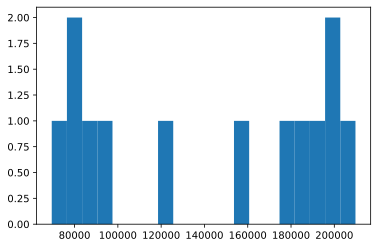

In [16]:
plt.hist(df_Abakan_years['Whole_year'], bins=20)
plt.show()

In [17]:
#коэффициент корреляции
np.corrcoef(df_Abakan_years['Whole_year'], df_Abakan_years['Year'])

array([[1.        , 0.93599318],
       [0.93599318, 1.        ]])

In [18]:
#ковариация 6 урок
cov = np.mean(df_Abakan_years['Whole_year']*df_Abakan_years['Year'])-np.mean(df_Abakan_years['Whole_year'])*np.mean(df_Abakan_years['Year'])
cov

181787.3846153617

In [19]:
# Рассмотрим так же один аэропорт - данные за год и по месяцам 
# Попробуем описать зависимость с помощью линейной регресии, для этого нужны функции рассчета коэффициентов
def find_b(X, y):
  b = (np.mean(X*y) - np.mean(X)*np.mean(y))/(np.mean(X**2)-(np.mean(X))**2)
  return b
def find_a(X, y, b):
  a = np.mean(y)-b*np.mean(X)
  return a

In [20]:
X=np.array(df_Abakan_years['Year'])
y=np.array(df_Abakan_years['Whole_year'])

In [21]:
b = find_b(X, y)
a = find_a(X, y, b)
print(b)
print(a)

12984.813186811549
-25995878.791205496


In [22]:
y_hat = -25995878.79 + 12984.813*X
y_hat

array([220458.657, 207473.844, 194489.031, 181504.218, 168519.405,
       155534.592, 142549.779, 129564.966, 116580.153, 103595.34 ,
        90610.527,  77625.714,  64640.901])

<function matplotlib.pyplot.show>

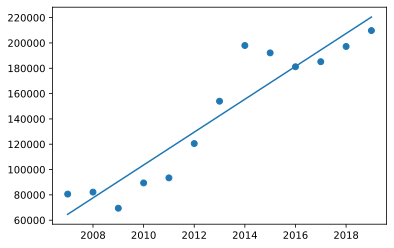

In [23]:
plt.scatter(X, y)
plt.plot(X, -25995878.79 + 12984.813*X)
plt.show

In [24]:
def mse(y, y_hat):
  mse=((y-y_hat)**2).sum()/len(y_hat)
  return mse

In [25]:
mse_y = mse(y, y_hat)
mse_y

333875209.7821028

In [26]:
# сделаем аналогичные рассчеты, только за нулевой отсчет примем 2007 год
X=np.array(df_Abakan_years['Year']-2007)
y=np.array(df_Abakan_years['Whole_year'])

In [27]:
b = find_b(X, y)
a = find_a(X, y, b)
print(b)
print(a)

12984.813186813195
64641.27472527468


In [28]:
#видим что коэффициент при X одинаков(что логично), а коэффициент a меньше по модулю, что несколько упростит расчеты

In [29]:
y_hat = 64641.27 + 12984.813*X
y_hat

array([220459.026, 207474.213, 194489.4  , 181504.587, 168519.774,
       155534.961, 142550.148, 129565.335, 116580.522, 103595.709,
        90610.896,  77626.083,  64641.27 ])

<function matplotlib.pyplot.show>

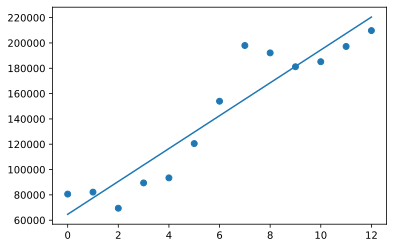

In [30]:
plt.scatter(X, y)
plt.plot(X, 64641.27 + 12984.813*X)
plt.show

In [31]:
mse_y = mse(y, y_hat)
mse_y

333875209.64162374

In [ ]:
#сделаем аналигичные рассчеты для нескольких месяцев и посмотрим зависимость количества пассажиров от месяца по годам

In [32]:
X=np.array(df_Abakan_years['Year']-2007)
y_j=np.array(df_Abakan_years['January'])
b = find_b(X, y_j)
a = find_a(X, y_j, b)
print(b)
print(a)

890.9450549450547
2843.9450549450567


In [33]:
y_hat_j = 2843.945 + 890.945*X
y_hat_j

array([13535.285, 12644.34 , 11753.395, 10862.45 ,  9971.505,  9080.56 ,
        8189.615,  7298.67 ,  6407.725,  5516.78 ,  4625.835,  3734.89 ,
        2843.945])

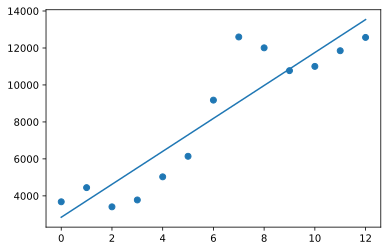

In [34]:
plt.scatter(X, y_j)
plt.plot(X, 2843.945 + 890.945*X)

In [35]:
mse_j = mse(y_j, y_hat_j)
mse_j

2197059.2713442296

In [36]:
X=np.array(df_Abakan_years['Year']-2007)
y_f=np.array(df_Abakan_years['February'])
b = find_b(X, y_f)
a = find_a(X, y_f, b)
print(b)
print(a)

698.1868131868131
3577.4175824175836


In [37]:
y_hat_f = 3577.42 + 698.19*X
y_hat_f

array([11955.7 , 11257.51, 10559.32,  9861.13,  9162.94,  8464.75,
        7766.56,  7068.37,  6370.18,  5671.99,  4973.8 ,  4275.61,
        3577.42])

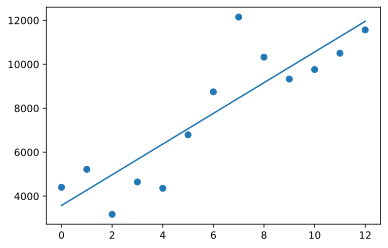

In [38]:
plt.scatter(X, y_f)
plt.plot(X, 3577.42 + 698.19*X)

In [39]:
mse_f = mse(y_f, y_hat_f)
mse_f

2117260.0682307687

In [40]:
X=np.array(df_Abakan_years['Year']-2007)
y_a=np.array(df_Abakan_years['April'])
b = find_b(X, y_a)
a = find_a(X, y_a, b)
print(b)
print(a)

801.7197802197801
4382.68131868132


In [41]:
y_hat_a = 4382.68 + 801.72*X
y_hat_a

array([14003.32, 13201.6 , 12399.88, 11598.16, 10796.44,  9994.72,
        9193.  ,  8391.28,  7589.56,  6787.84,  5986.12,  5184.4 ,
        4382.68])

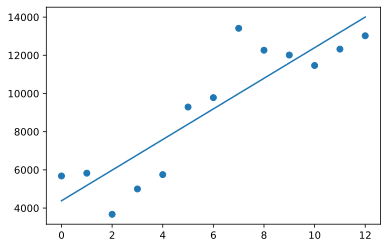

In [42]:
plt.scatter(X, y_a)
plt.plot(X, 4382.68 + 801.72*X)

In [43]:
mse_a = mse(y_a, y_hat_a)
mse_a

2447470.4391384614

In [44]:
X=np.array(df_Abakan_years['Year']-2007)
y_s=np.array(df_Abakan_years['September'])
b = find_b(X, y_s)
a = find_a(X, y_s, b)
print(b)
print(a)

1210.049450549451
6776.62637362637


In [45]:
y_hat_s = 6776.62 + 1210.05*X
y_hat_s

array([21297.22, 20087.17, 18877.12, 17667.07, 16457.02, 15246.97,
       14036.92, 12826.87, 11616.82, 10406.77,  9196.72,  7986.67,
        6776.62])

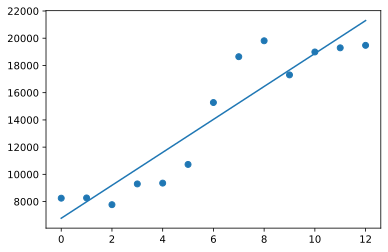

In [46]:
plt.scatter(X, y_s)
plt.plot(X, 6776.62 + 1210.05*X)

In [47]:
mse_s = mse(y_s, y_hat_s)
mse_s

3341085.882938459

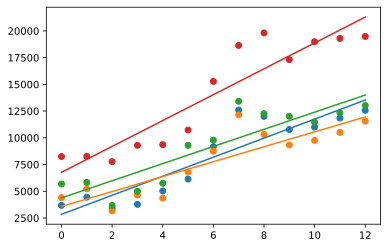

In [48]:
# посмотрим все графики вместе
plt.scatter(X, y_j)
plt.plot(X, 2843.945 + 890.945*X)
plt.scatter(X, y_f)
plt.plot(X, 3577.42 + 698.19*X)
plt.scatter(X, y_a)
plt.plot(X, 4382.68 + 801.72*X)
plt.scatter(X, y_s)
plt.plot(X, 6776.62 + 1210.05*X)

In [49]:
# можно сделать следующие выводы - количество пассажиров зависит от года и от месяца
# в 2014 году было много пассажиров, что видно по нескольким месяцам

In [50]:
#посмотрим графики по другим аэропортам по сумме пассажиров за год
selection2 = df_years.Airport_name!='Yaroslavl (Tunoshna)'
df_Yaroslavl_years= df_years[~selection2]
df_Yaroslavl_years

,Airport_name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole_year
499,Yaroslavl (Tunoshna),2019,1836.0,1770.0,1828.0,1555.0,1930.0,4187.0,5215.0,5704.0,5164.0,3881.0,2966.0,0.00,39079.0
747,Yaroslavl (Tunoshna),2018,1381.0,888.0,1409.0,1521.0,2063.0,2075.0,3542.0,3703.0,2353.0,2807.0,1518.0,74.18,25571.0
1039,Yaroslavl (Tunoshna),2017,743.0,400.0,519.0,406.0,1223.0,2979.0,3650.0,3978.0,4669.0,1561.0,1653.0,723.92,23817.0
1331,Yaroslavl (Tunoshna),2016,615.0,626.0,335.0,311.0,81.0,1906.0,2987.0,3240.0,2192.0,1068.0,1318.0,232.70,15841.0
1623,Yaroslavl (Tunoshna),2015,821.0,430.0,818.0,828.0,912.0,1080.0,1185.0,2576.0,2258.0,1549.0,1380.0,691.78,15174.0
1915,Yaroslavl (Tunoshna),2014,274.0,229.0,769.0,763.0,726.0,1133.0,1390.0,928.0,1615.0,1548.0,1048.0,793.70,11312.0
2207,Yaroslavl (Tunoshna),2013,420.0,1121.0,982.0,468.0,740.0,811.0,893.0,979.0,1177.0,1177.0,1738.0,954.50,11605.0
2499,Yaroslavl (Tunoshna),2012,195.0,804.0,796.0,750.0,691.0,633.0,736.0,877.0,1091.0,1404.0,1131.0,1558.59,10052.0
2791,Yaroslavl (Tunoshna),2011,421.0,853.0,585.0,343.0,913.0,523.0,422.0,456.0,1177.0,315.0,354.0,1253.47,6569.0
3083,Yaroslavl (Tunoshna),2010,394.0,305.0,380.0,305.0,256.0,335.0,219.0,595.0,1176.0,544.0,431.0,1209.50,5326.0


<function matplotlib.pyplot.show>

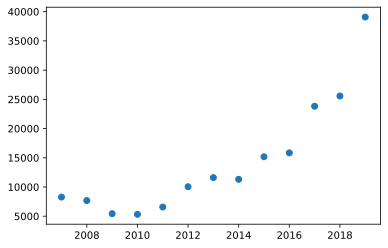

In [51]:
plt.scatter(df_Yaroslavl_years['Year'], df_Yaroslavl_years['Whole_year'])
plt.show

In [52]:
#коэффициент корреляции
np.corrcoef(df_Yaroslavl_years['Whole_year'], df_Yaroslavl_years['Year'])

array([[1.        , 0.86281895],
       [0.86281895, 1.        ]])

In [53]:
selection3 = df_years.Airport_name!='Yakutsk'
df_Yakutsk_years= df_years[~selection3]
df_Yakutsk_years

,Airport_name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole_year
496,Yakutsk,2019,51858.0,51326.0,65188.0,73161.0,70950.0,93695.0,115339.0,118026.0,92665.0,78531.0,69091.0,1256.78,949746.0
744,Yakutsk,2018,51639.0,49959.0,61877.0,68345.0,68480.0,93922.0,108364.0,113964.0,90958.0,71375.0,63911.0,1226.69,908384.0
1036,Yakutsk,2017,49666.0,48331.0,62926.0,67360.0,68018.0,94852.0,106553.0,110232.0,89084.0,76601.0,62824.0,1448.48,902463.0
1328,Yakutsk,2016,43390.0,42573.0,54505.0,62886.0,62138.0,97492.0,111995.0,119348.0,87092.0,70995.0,58681.0,1506.75,875869.0
1620,Yakutsk,2015,49686.0,44298.0,55546.0,60236.0,60965.0,92948.0,113191.0,117341.0,88150.0,73080.0,56743.0,1473.86,871875.0
1912,Yakutsk,2014,48869.0,47382.0,60913.0,64637.0,63312.0,85927.0,105513.0,111752.0,84958.0,74096.0,60721.0,1443.24,870040.0
2204,Yakutsk,2013,43111.0,41027.0,54894.0,58929.0,61118.0,83947.0,102772.0,110087.0,83320.0,73801.0,63311.0,1868.57,840479.0
2496,Yakutsk,2012,36507.0,35314.0,44741.0,49138.0,50741.0,78731.0,98308.0,106400.0,77287.0,60552.0,53835.0,1752.62,747129.0
2788,Yakutsk,2011,31425.0,28261.0,40118.0,45515.0,45802.0,65743.0,83220.0,92363.0,68010.0,52145.0,48183.0,1716.60,649246.0
3080,Yakutsk,2010,27916.0,28152.0,35719.0,40624.0,40540.0,60362.0,74918.0,81080.0,61147.0,48181.0,37818.0,1649.85,577323.0


<function matplotlib.pyplot.show>

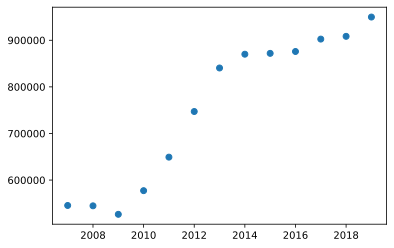

In [54]:
plt.scatter(df_Yakutsk_years['Year'], df_Yakutsk_years['Whole_year'])
plt.show

In [55]:
#коэффициент корреляции
np.corrcoef(df_Yakutsk_years['Whole_year'], df_Yakutsk_years['Year'])

array([[1.        , 0.95221791],
       [0.95221791, 1.        ]])

In [ ]:
# можно сделать следующие выводы - графики сильно различаются по внешнему виду, 
#так как на пассажиропоток могли влиять локальные изменения(ремонт, политическая обстановка и тд)
 #поэтому по каждому аэропорту нужно анализировать данные отдельно